In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("PreliminaryData.csv", names = ['rows', 'columns', 'proportion']) # load the data

In [3]:
df.head() # view the data

,rows,columns,proportion
0,1,1,1
1,1,2,1/2
2,1,3,1
3,1,4,1
4,1,5,1/2


In [4]:
df.shape

(40000, 3)

In [5]:
y = df['proportion']

In [6]:
X = df[['rows', 'columns']]

In [7]:
y = df['proportion'].apply(lambda x: 1 if x == "1" else 0) # make proportions = 1 1, otherwise 0

In [8]:
y[0:5]

0    1
1    0
2    1
3    1
4    0
Name: proportion, dtype: int64

## Random Forest Classifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, shuffle = True) #test data is 20% of sample

In [10]:
model = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced') # model with 100 different estimators

In [11]:
model.fit(X_train, y_train) # train the model

RandomForestClassifier(class_weight='balanced')

In [12]:
y_pred = model.predict(X_test) # use the trained model to  

In [13]:
accuracy = accuracy_score(y_test, y_pred) # get how accurate our model is

In [14]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.55


In [15]:
report = classification_report(y_test, y_pred)

In [16]:
print(report)

              precision    recall  f1-score   support

           0       0.35      0.30      0.32      2869
           1       0.64      0.68      0.66      5131

    accuracy                           0.55      8000
   macro avg       0.49      0.49      0.49      8000
weighted avg       0.53      0.55      0.54      8000



In [17]:
mat = confusion_matrix(y_pred, y_test)

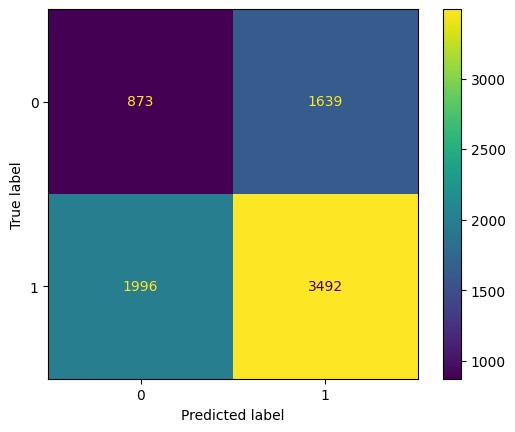

In [18]:
disp = ConfusionMatrixDisplay(mat)
disp.plot()

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 43, test_size = 0.2, shuffle = True) # test data is 20% of sample

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)

In [23]:
X_test_scaled = scaler.fit_transform(X_test)

In [24]:
model = LogisticRegression(class_weight = 'balanced')

In [25]:
model.fit(X_train_scaled, y_train) # training data

LogisticRegression(class_weight='balanced')

In [26]:
y_pred = model.predict(X_test_scaled)

In [27]:
accuracy = accuracy_score(y_test, y_pred)

In [28]:
print(f'Accuracy: {accuracy: .2f}') # this model is a lot better

Accuracy:  0.50


In [29]:
mat = confusion_matrix(y_pred, y_test)

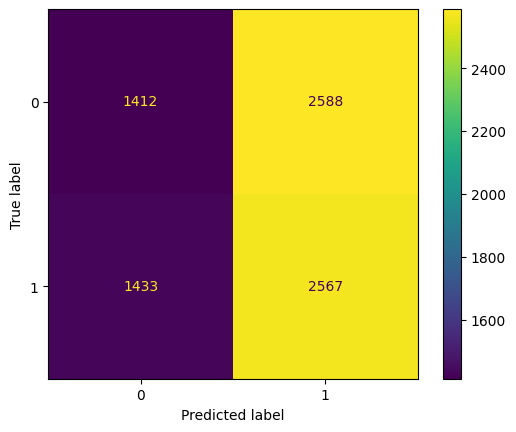

In [30]:
disp = ConfusionMatrixDisplay(mat)
disp.plot()